# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [3]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846, 1)
(549, 18) (549, 1) (297, 18) (297, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
101,95.0,42,85,174,66,9,153,44,19,144,168,347,150,65,11,5,196,204
24,99.0,53,105,219,66,11,204,32,23,165,221,623,224,68,0,6,191,201
448,101.0,53,91,194,65,6,204,32,23,161,231,636,214,78,5,14,192,192
370,96.0,41,77,177,64,5,177,36,21,134,205,485,148,74,0,4,196,198
476,101.0,55,101,183,57,13,225,30,25,177,225,741,204,71,5,10,186,198
77,86.0,40,62,140,62,7,150,45,19,133,165,330,173,82,2,3,180,185
642,95.0,46,104,208,66,9,191,35,22,148,210,543,169,68,0,28,190,200
32,93.0,35,66,154,59,6,142,46,18,128,162,304,120,64,5,13,197,202
85,110.0,58,106,180,51,6,261,26,28,171,278,998,257,83,9,13,181,182
189,90.0,36,78,179,64,8,157,42,19,126,182,367,142,66,1,20,192,198


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,548.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,94.177007,45.194900,82.571949,170.530055,62.209472,8.763206,169.885246,40.874317,20.726776,148.224044,189.983607,447.116576,175.954463,72.420765,6.417122,12.868852,188.817851,195.930783
std,8.295263,6.761331,15.881542,33.833770,10.260913,5.556153,34.766000,9.506656,2.786508,15.881372,32.293896,181.373171,34.465466,8.151374,5.630904,9.095455,9.530759,7.365010
min,73.000000,33.000000,36.000000,73.000000,47.000000,2.000000,6.000000,26.000000,17.000000,20.000000,127.000000,189.000000,109.000000,59.000000,0.000000,0.000000,19.000000,181.000000
25%,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,150.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,158.000000,42.000000,20.000000,146.000000,180.000000,370.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,51.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,161.000000,219.000000,608.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,100.000000,112.000000,333.000000,199.000000,73.000000,265.000000,162.000000,40.000000,188.000000,320.000000,1018.000000,401.000000,135.000000,72.000000,40.000000,204.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 101 to 541
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       548 non-null    float64
 1   CIRCULARITY                       549 non-null    int64  
 2   DISTANCE CIRCULARITY              549 non-null    int64  
 3   RADIUS RATIO                      549 non-null    int64  
 4   PR.AXIS ASPECT RATIO              549 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           549 non-null    int64  
 6   SCATTER RATIO                     549 non-null    int64  
 7   ELONGATEDNESS                     549 non-null    int64  
 8   PR.AXIS RECTANGULARITY            549 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         549 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  549 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  549 non-null    int64  
 12  SCALED RADI

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

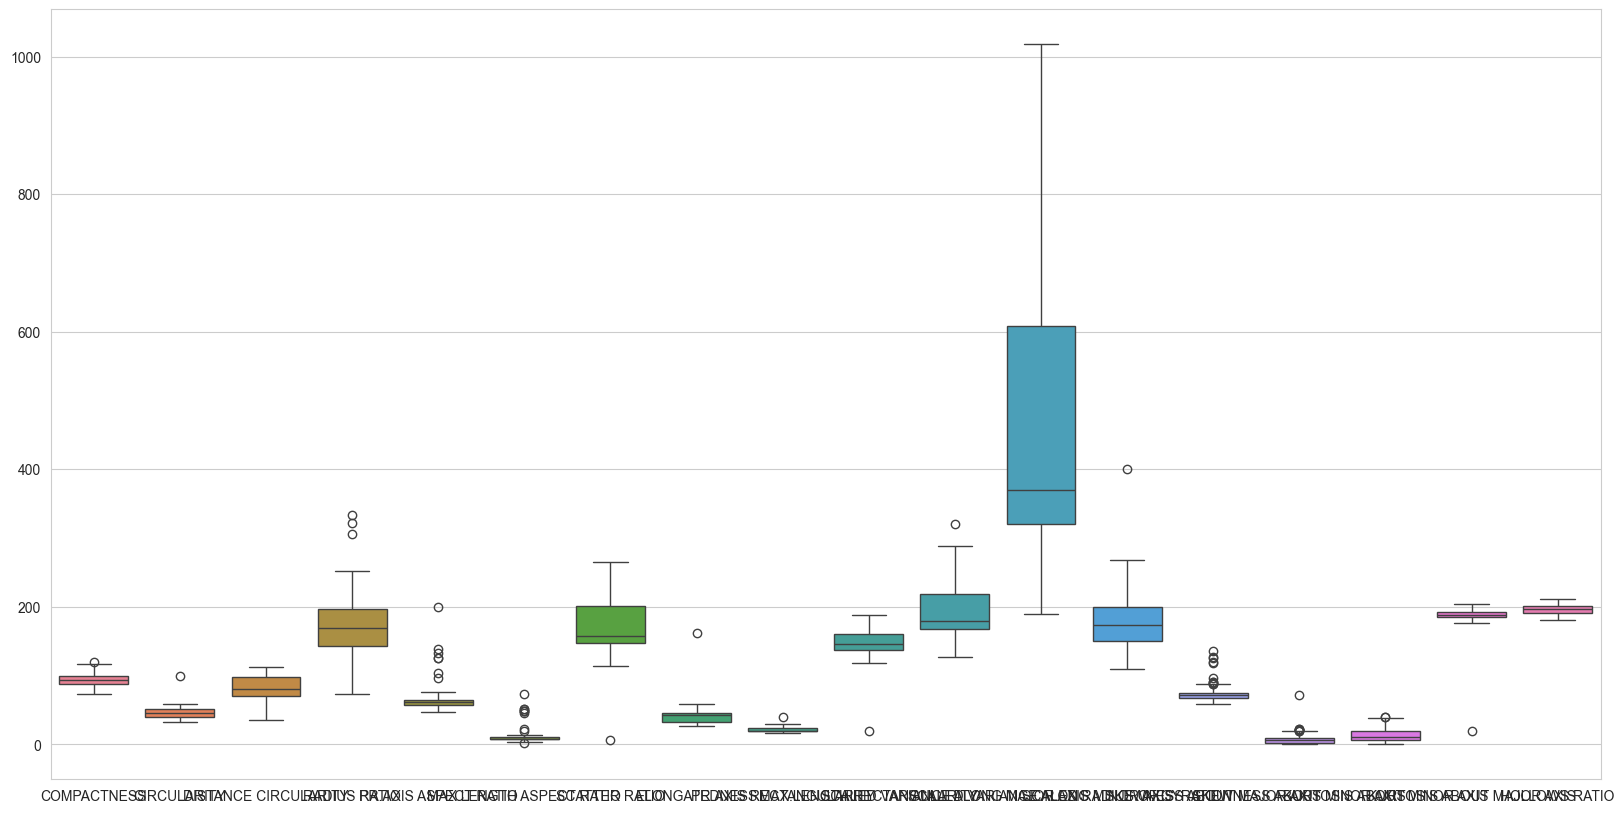

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)
sns.boxplot(X_train)
plt.show()

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [13]:
nan_rows = X_train.isna().any(axis=1)

In [14]:
X_train[nan_rows]

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
752,NaN,100,36,73,199,73,6,162,40,20,127,189,401,125,72,6,19,200


In [22]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique)
print(counts)

['204' 'bus' 'opel' 'saab' 'van']
[  1 138 143 142 125]


In [33]:
type(y_train)

pandas.core.frame.DataFrame

In [36]:
y_train[y_train["class"] == "204"]

,class
752,204


In [37]:
### I am not a specialist in a way, how data was collected. I can see some "potential" outliers, but most of them are not so critical. But I see NaNs in training data (in one row), and taking into account other features values in this row, this is the most critical outlier. This row also has strange label. I delete it:

X_train = X_train[~nan_rows]
y_train = y_train[~nan_rows]

### We also need to normalize data. This is not crucial for logistic regression, however, it still may lead to better performance. Moreover, it is absolutely crucial for PCA (scaling conserves correlations in data, but PCA is less affected by magnitudes then. Centering data is needed for correct SVD application, otherwise, it looses geometrical sense.)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from scikitplot.metrics import plot_roc

In [39]:
model = LogisticRegression(solver='saga', tol=1e-3, max_iter=500)
grid_params = {"C": [0.1, 1, 10, 100, 500]}
grid_search = GridSearchCV(model, grid_params, scoring='accuracy', cv=5, n_jobs=4)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(best_params)

C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 10}


In [40]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [42]:
best_model = LogisticRegression(solver="saga", tol=1e-3, max_iter=500, **best_params)
best_model.fit(X_train_scaled, y_train)

LogisticRegression(C=10, max_iter=500, solver='saga', tol=0.001)

In [43]:
y_pred = best_model.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)
print("F1 score: ", f1)
print("Accuracy Score: ", accuracy)

F1 score:  0.7767274160634642
Accuracy Score:  0.7811447811447811


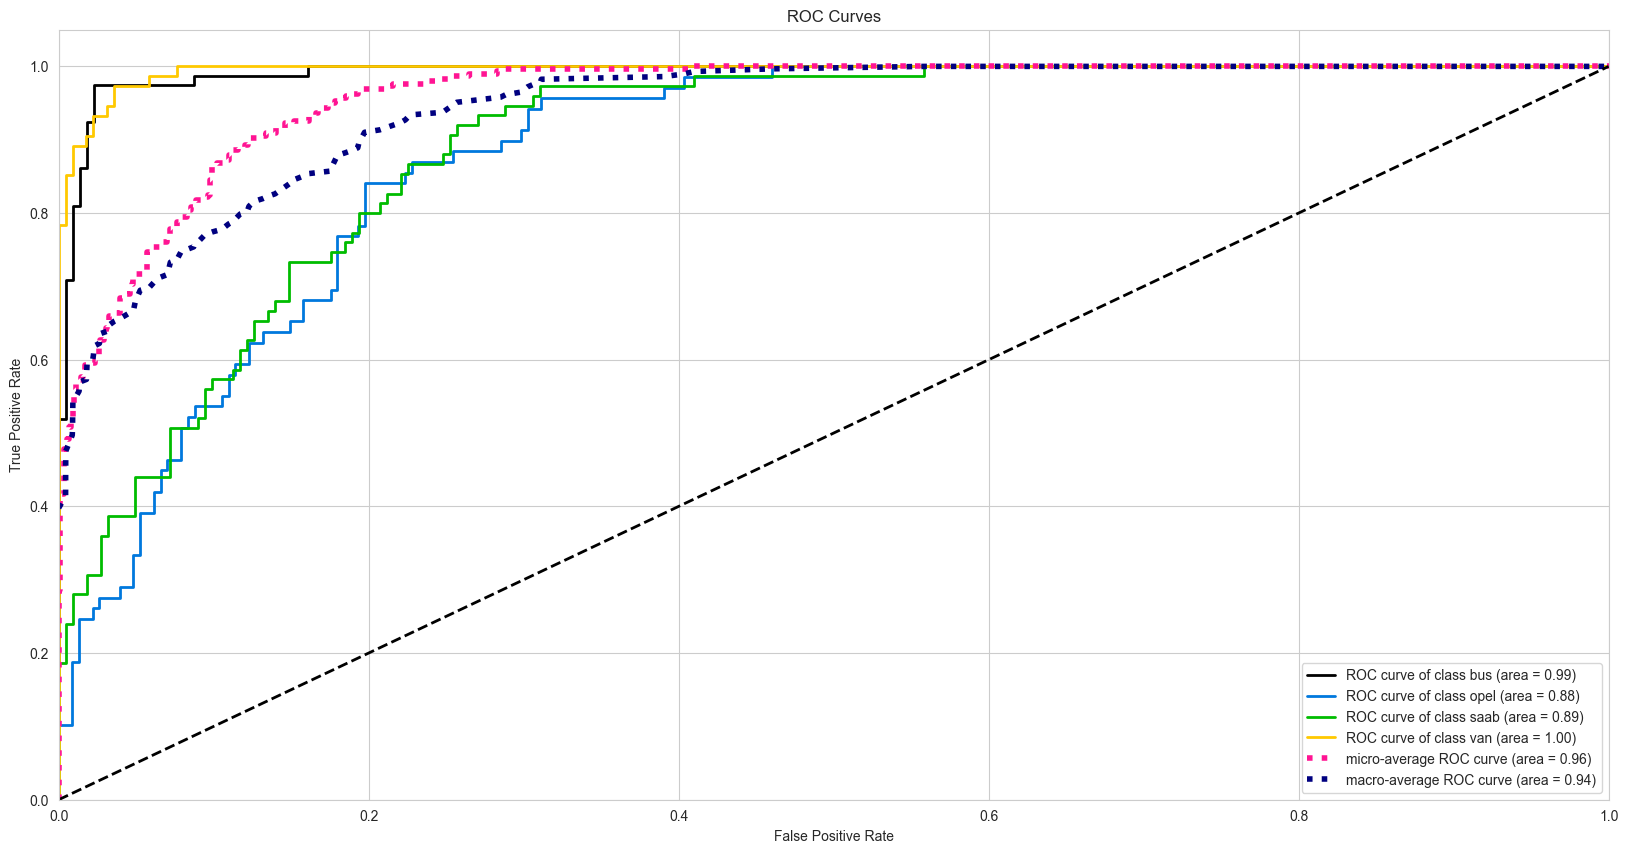

In [44]:
y_pred_proba = best_model.predict_proba(X_test_scaled)
plot_roc(y_test, y_pred_proba)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [45]:
from sklearn.decomposition import PCA

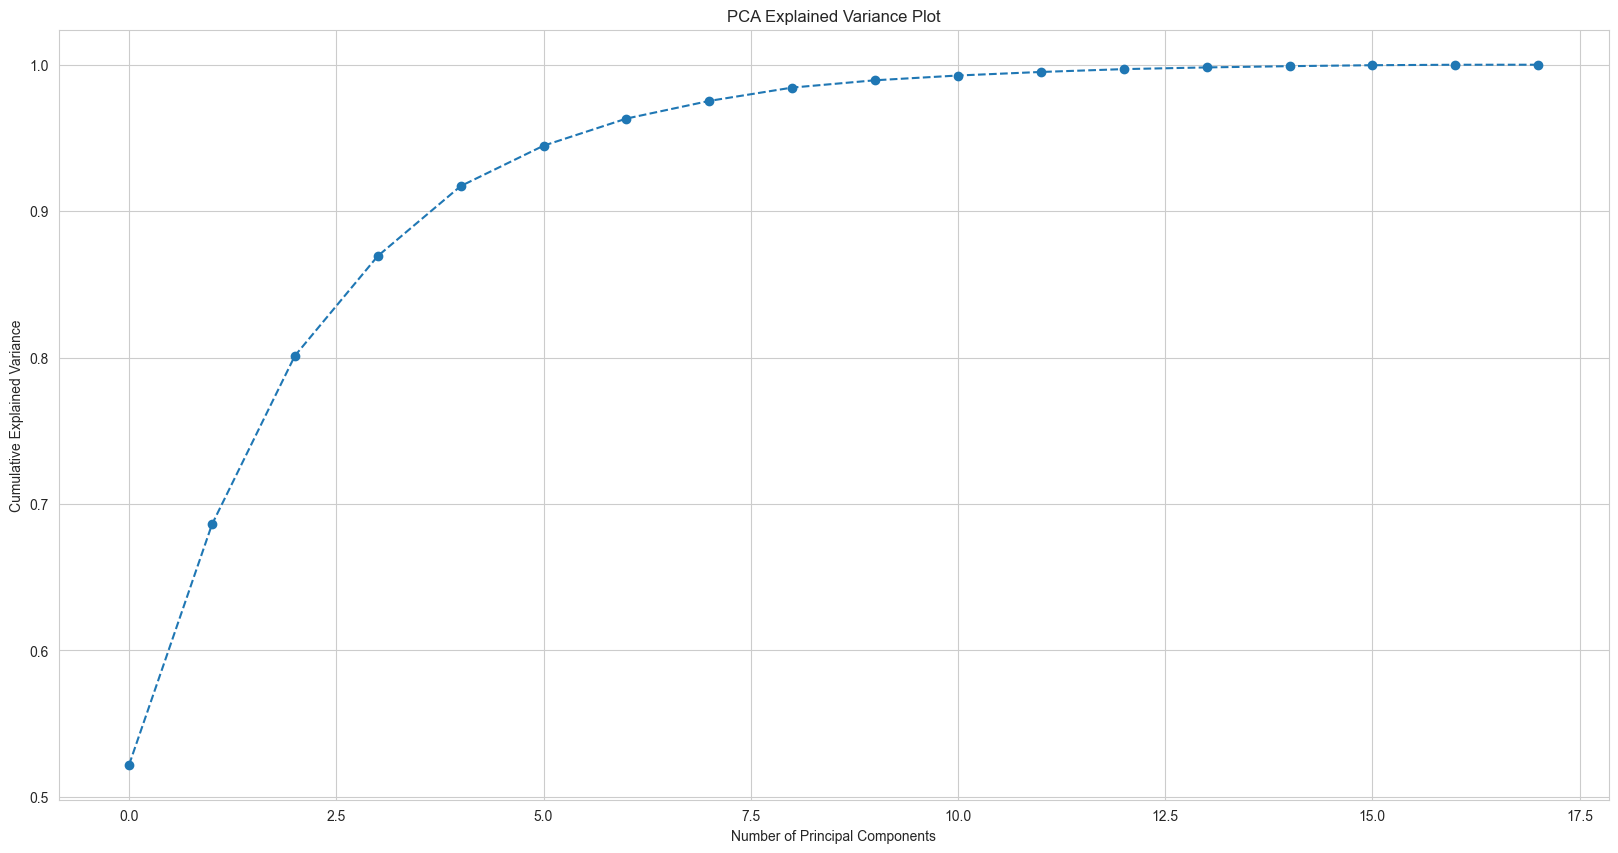

In [46]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Plot')
plt.grid(True)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [48]:
np.cumsum(explained_variance)

array([0.52198018, 0.68608736, 0.80123167, 0.86935214, 0.91712057,
       0.94470109, 0.96323035, 0.97528986, 0.98439356, 0.98938543,
       0.99263195, 0.99505479, 0.99699907, 0.9981645 , 0.99901576,
       0.99966754, 0.99998181, 1.        ])

In [49]:
### I have already normalized data previously (and explained how and why). Based on explained variance, I prefer to choose 10 components (the total explained variance is more than 95% and moreover, other components add less than 0.5% to the total explained variance)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [50]:
model = LogisticRegression(solver='saga', tol=1e-3, max_iter=500)
grid_params = {"C": [0.1, 1, 10, 100, 500]}
grid_search = GridSearchCV(model, grid_params, scoring='accuracy', cv=5, n_jobs=4)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print(best_params)

{'C': 1}


In [51]:
best_model = LogisticRegression(solver="saga", tol=1e-3, max_iter=500, **best_params)
best_model.fit(X_train_pca, y_train)

LogisticRegression(C=1, max_iter=500, solver='saga', tol=0.001)

In [52]:
y_pred = best_model.predict(X_test_pca)
f1 = f1_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)
print("F1 score: ", f1)
print("Accuracy Score: ", accuracy)

F1 score:  0.7217026373811617
Accuracy Score:  0.7306397306397306


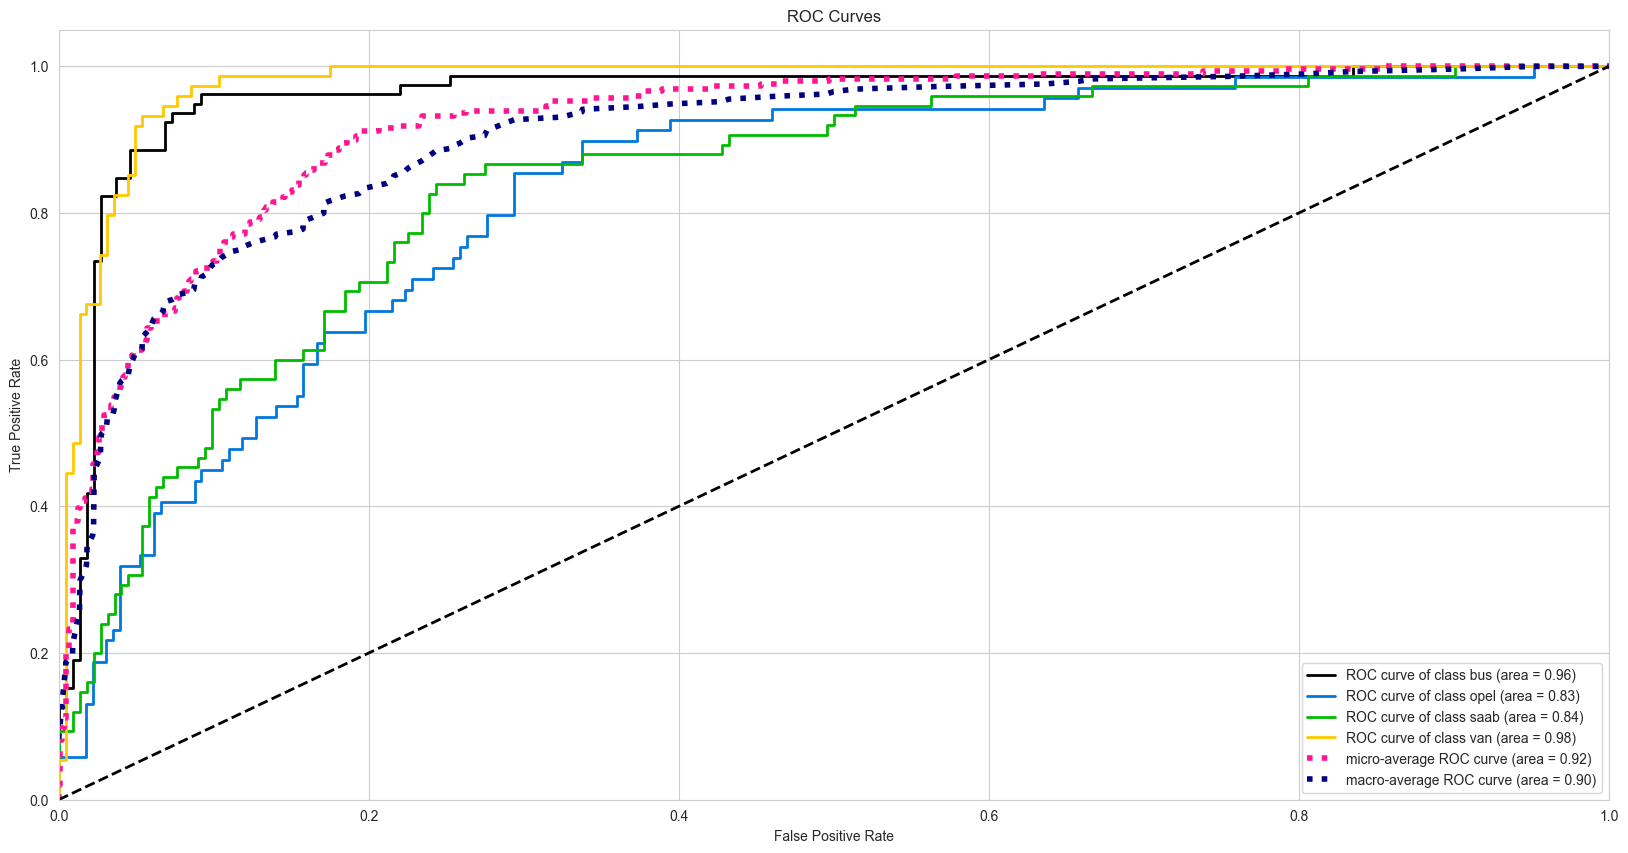

In [53]:
y_pred_proba = best_model.predict_proba(X_test_pca)
plot_roc(y_test, y_pred_proba)
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Tip: there's a function in sklern to do that

In [54]:
from sklearn.model_selection import learning_curve

In [56]:
best_params = {"C": 10}
model = LogisticRegression(solver="saga", tol=1e-3, max_iter=500, **best_params)

n_splits = 10
X_train_splits = np.array_split(X_train_scaled, n_splits)
y_train_splits = np.array_split(y_train, n_splits)

accuracy_scores = []
f1_scores = []
train_sizes = []

for i in range(1, n_splits + 1):
    
    X_train_combined = np.vstack(X_train_splits[:i])
    y_train_combined = np.hstack(y_train_splits[:i])
    
    model.fit(X_train_combined, y_train_combined)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    train_sizes.append(len(X_train_combined))

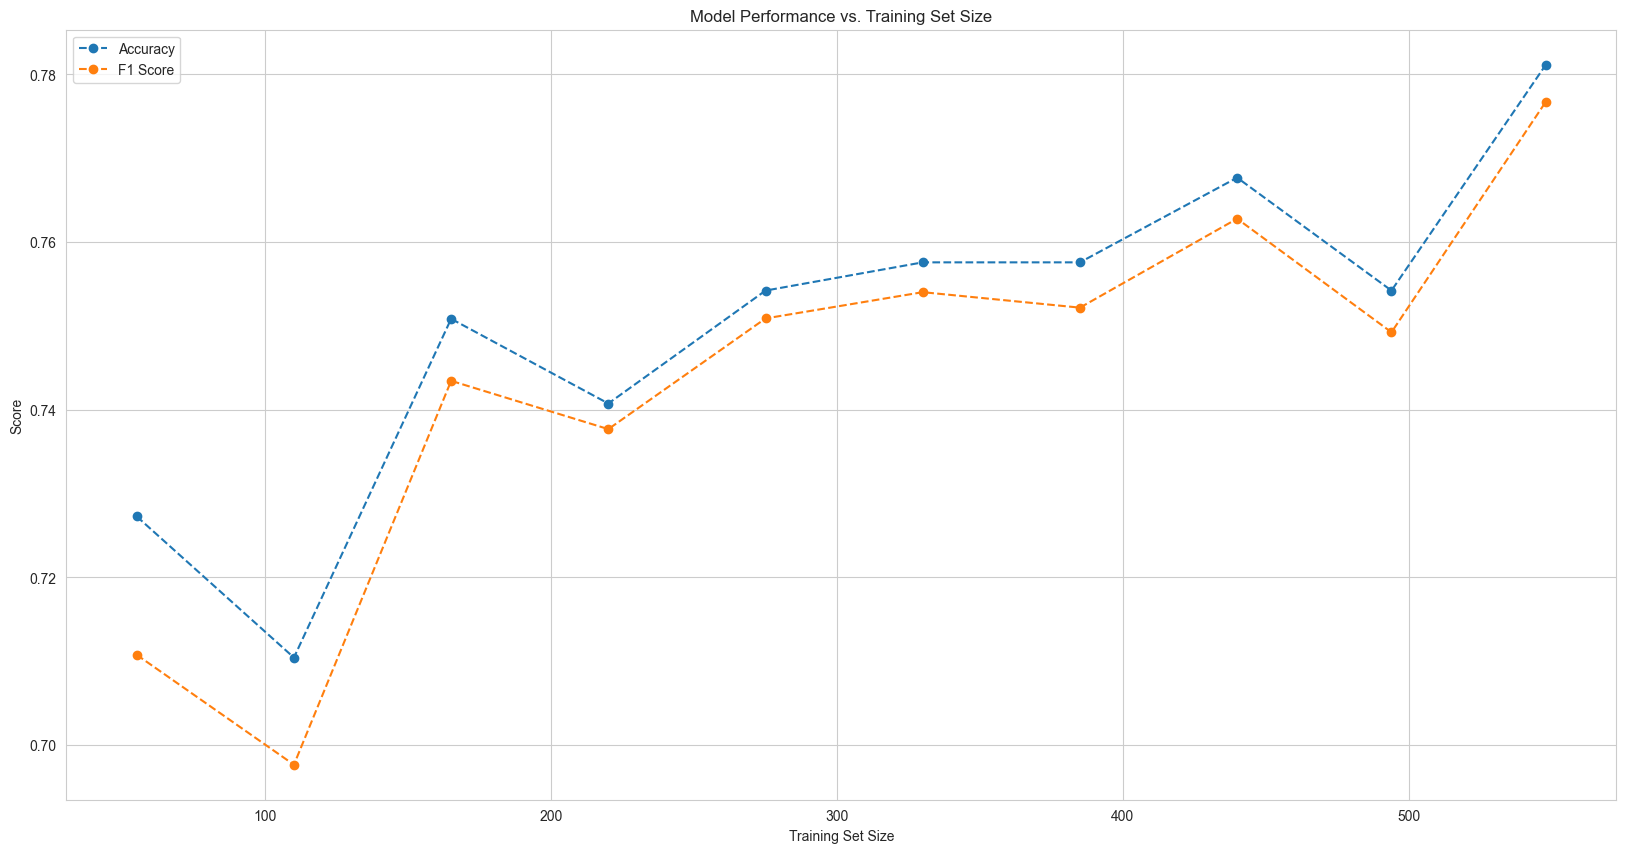

In [57]:
plt.plot(train_sizes, accuracy_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(train_sizes, f1_scores, marker='o', linestyle='--', label='F1 Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Model Performance vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.show()

###### В общем, очевидно, что с ростом размера обучающих данных, результат должен улучшаться, если данные правильно обработаны, релевантны и т.д. Я ожидал более красивую картинку, здесь же какие-то колебания.. Но с учётом того, что мы зафиксировали регуляризацию и не проводили кросс-валидацию, и не усредняли результат (а ведь данные небольшие), всё вполне прилично. 